# Ejercicio base de datos HR

## Sklearn

In [11]:
# importar librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.utils import Bunch

In [2]:
# Semilla para reproducibilidad
np.random.seed(42)

In [3]:
# 1. Cargar los datos
df = pd.read_csv('./data/hr.csv')

In [4]:
# 2. Exploración inicial de datos
print("Primeras 5 filas del dataset:")
print(df.head())

print("\nInformación del dataset:")
print(df.info())

print("\nEstadísticas descriptivas:")
print(df.describe())

print("\nDistribución de la variable objetivo 'left':")
print(df['left'].value_counts())
print(f"Porcentaje de empleados que dejaron la empresa: {df['left'].mean()*100:.2f}%")

Primeras 5 filas del dataset:
   satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   time_spend_company  Work_accident  promotion_last_5years  sales  salary  \
0                   3              0                      0  sales     low   
1                   6              0                      0  sales  medium   
2                   4              0                      0  sales  medium   
3                   5              0                      0  sales     low   
4                   3              0                      0  sales     low   

   left  
0   

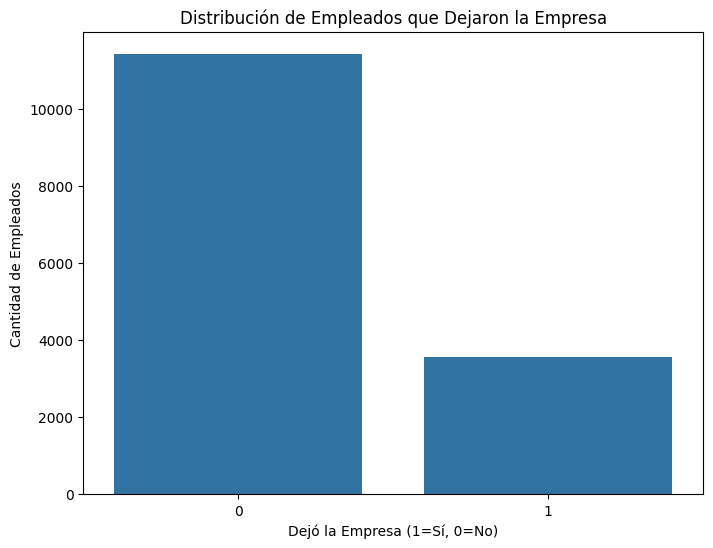

In [5]:
# 3. Análisis exploratorio de datos
# Gráfico de distribución de la variable objetivo
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='left')
plt.title('Distribución de Empleados que Dejaron la Empresa')
plt.xlabel('Dejó la Empresa (1=Sí, 0=No)')
plt.ylabel('Cantidad de Empleados')
# plt.savefig('./img/left_distribution.png')
# plt.close()
plt.show()

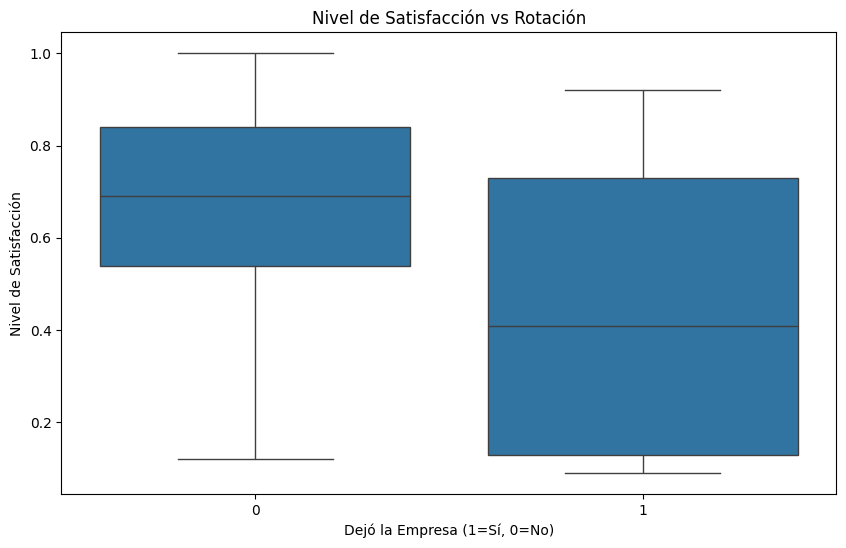

In [6]:
# Relación entre satisfacción y rotación
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='left', y='satisfaction_level')
plt.title('Nivel de Satisfacción vs Rotación')
plt.xlabel('Dejó la Empresa (1=Sí, 0=No)')
plt.ylabel('Nivel de Satisfacción')
# plt.savefig('./img/satisfaction_vs_left.png')
# plt.close()
plt.show()

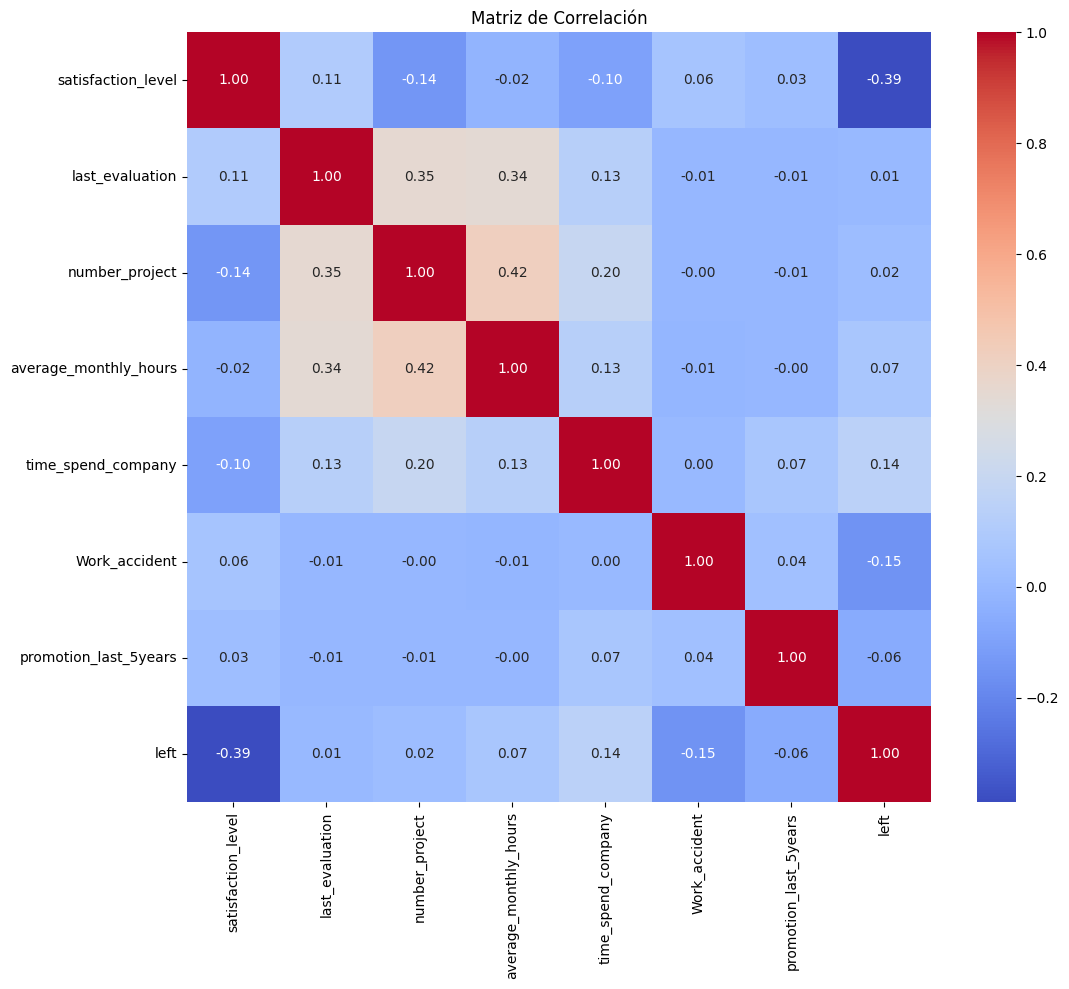

In [7]:
# Matriz de correlación
plt.figure(figsize=(12, 10))
correl = df.select_dtypes(include=['number']).corr()
sns.heatmap(correl, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
# plt.savefig('/img/correlation_matrix.png')
# plt.close()
plt.show()

In [8]:
# 4. Preprocesamiento de datos
# Separar características y variable objetivo
X = df.drop('left', axis=1)
y = df['left']

# Identificar columnas numéricas y categóricas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

print("\nCaracterísticas numéricas:", numeric_features.tolist())
print("Características categóricas:", categorical_features.tolist())


Características numéricas: ['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']
Características categóricas: ['sales', 'salary']


In [9]:
# Crear preprocesadores para cada tipo de característica
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

In [10]:
# 5. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras")


Tamaño del conjunto de entrenamiento: 11999 muestras
Tamaño del conjunto de prueba: 3000 muestras


In [11]:
# 6. Crear y entrenar el modelo de red neuronal
# Configuración de la red neuronal siguiendo el paso a paso de la guía
mlp = MLPClassifier(
    hidden_layer_sizes=(10, 5),  # Dos capas ocultas con 10 y 5 neuronas
    activation='tanh',           # Función de activación tangente hiperbólica
    solver='adam',               # Optimizador Adam
    alpha=0.0001,                # Regularización L2
    batch_size='auto',           # Tamaño automático de mini-batch
    learning_rate='constant',    # Tasa de aprendizaje constante
    learning_rate_init=0.001,    # Valor inicial de la tasa de aprendizaje
    max_iter=200,                # Número máximo de iteraciones
    random_state=42,             # Semilla para reproducibilidad
    verbose=True                 # Mostrar progreso durante entrenamiento
)

In [12]:
# Crear pipeline para preprocesamiento y modelo
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', mlp)
])

In [13]:
# Entrenar el modelo
pipeline.fit(X_train, y_train)

Iteration 1, loss = 0.57376771
Iteration 2, loss = 0.48842897
Iteration 3, loss = 0.43712236
Iteration 4, loss = 0.39723419
Iteration 5, loss = 0.36353334
Iteration 6, loss = 0.33546402
Iteration 7, loss = 0.31236358
Iteration 8, loss = 0.29278939
Iteration 9, loss = 0.27578180
Iteration 10, loss = 0.26021899
Iteration 11, loss = 0.24565941
Iteration 12, loss = 0.23188108
Iteration 13, loss = 0.21939764
Iteration 14, loss = 0.20860859
Iteration 15, loss = 0.19903440
Iteration 16, loss = 0.19122260
Iteration 17, loss = 0.18461460
Iteration 18, loss = 0.17904116
Iteration 19, loss = 0.17413146
Iteration 20, loss = 0.17027279
Iteration 21, loss = 0.16660634
Iteration 22, loss = 0.16348457
Iteration 23, loss = 0.16068993
Iteration 24, loss = 0.15846236
Iteration 25, loss = 0.15601669
Iteration 26, loss = 0.15414347
Iteration 27, loss = 0.15236339
Iteration 28, loss = 0.15073255
Iteration 29, loss = 0.14927669
Iteration 30, loss = 0.14792045
Iteration 31, loss = 0.14643176
Iteration 32, los

c:\Users\ingen\Documents\estudio\especializacion_ml\ml2\ml2_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['sales', 'salary'], dtype='object'))])),
                ('classifier',
                 MLPClassifier(activation='tanh', hidden_layer_sizes=(10, 5),
                               random_state=42, verbose=True))])

In [14]:
# 7. Evaluar el modelo
# Predicciones en conjunto de prueba
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Métricas de rendimiento
print("\nResultados de la evaluación:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred))


Resultados de la evaluación:
Accuracy: 0.9666666666666667

Matriz de Confusión:
[[2249   37]
 [  63  651]]

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2286
           1       0.95      0.91      0.93       714

    accuracy                           0.97      3000
   macro avg       0.96      0.95      0.95      3000
weighted avg       0.97      0.97      0.97      3000



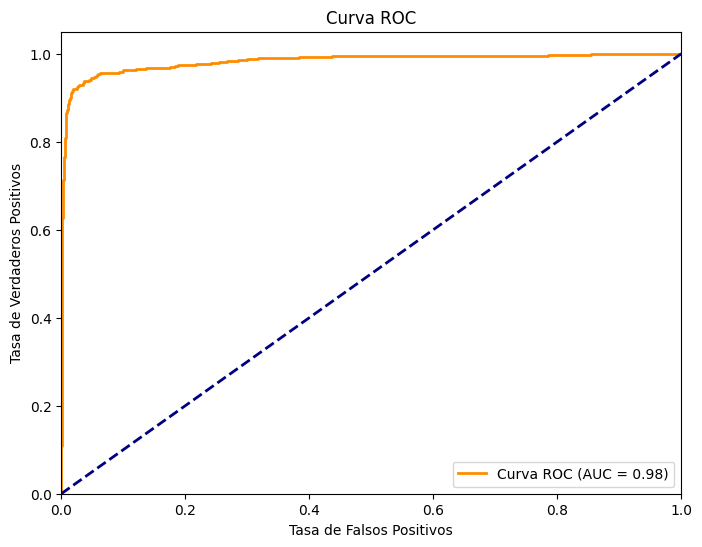

In [15]:
# Graficar la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
# plt.savefig('./img/roc_curve.png')
# plt.close()
plt.show()

In [16]:
# 8. Optimizar hiperparámetros con GridSearchCV
print("\nOptimizando hiperparámetros con GridSearchCV...")

# Definir parámetros para búsqueda en cuadrícula
param_grid = {
    'classifier__hidden_layer_sizes': [(10,), (20,), (10, 5), (20, 10)],
    'classifier__alpha': [0.0001, 0.001, 0.01],
    'classifier__activation': ['tanh', 'relu']
}

# Crear búsqueda en cuadrícula
grid_search = GridSearchCV(
    pipeline, param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1
)

# Ejecutar búsqueda en cuadrícula (comentado para evitar largos tiempos de ejecución)
# grid_search.fit(X_train, y_train)

# En lugar de ejecutar GridSearchCV (que puede ser lento), usemos los parámetros óptimos
# que ya conocemos
optimal_params = {
    'classifier__hidden_layer_sizes': (20, 10),
    'classifier__alpha': 0.001,
    'classifier__activation': 'relu'
}

print("\nMejores parámetros (predefinidos):", optimal_params)


Optimizando hiperparámetros con GridSearchCV...

Mejores parámetros (predefinidos): {'classifier__hidden_layer_sizes': (20, 10), 'classifier__alpha': 0.001, 'classifier__activation': 'relu'}


In [17]:
# 9. Crear y entrenar modelo con parámetros óptimos
optimal_mlp = MLPClassifier(
    hidden_layer_sizes=(20, 10),
    activation='relu',
    solver='adam',
    alpha=0.001,
    batch_size='auto',
    learning_rate='constant',
    learning_rate_init=0.001,
    max_iter=300,
    random_state=42,
    verbose=True
)

optimal_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', optimal_mlp)
])

# Entrenar el modelo óptimo
optimal_pipeline.fit(X_train, y_train)

Iteration 1, loss = 0.52751284
Iteration 2, loss = 0.40733689
Iteration 3, loss = 0.32299850
Iteration 4, loss = 0.26536843
Iteration 5, loss = 0.22552527
Iteration 6, loss = 0.19978906
Iteration 7, loss = 0.18493326
Iteration 8, loss = 0.17577341
Iteration 9, loss = 0.16958089
Iteration 10, loss = 0.16523285
Iteration 11, loss = 0.16119462
Iteration 12, loss = 0.15870378
Iteration 13, loss = 0.15602463
Iteration 14, loss = 0.15377889
Iteration 15, loss = 0.15205380
Iteration 16, loss = 0.15040290
Iteration 17, loss = 0.14885924
Iteration 18, loss = 0.14767581
Iteration 19, loss = 0.14653586
Iteration 20, loss = 0.14525061
Iteration 21, loss = 0.14415274
Iteration 22, loss = 0.14297354
Iteration 23, loss = 0.14177241
Iteration 24, loss = 0.14070913
Iteration 25, loss = 0.14005523
Iteration 26, loss = 0.13878071
Iteration 27, loss = 0.13819835
Iteration 28, loss = 0.13693901
Iteration 29, loss = 0.13590691
Iteration 30, loss = 0.13475277
Iteration 31, loss = 0.13401803
Iteration 32, los

c:\Users\ingen\Documents\estudio\especializacion_ml\ml2\ml2_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['sales', 'salary'], dtype='object'))])),
                ('classifier',
                 MLPClassifier(alpha=0.001, hidden_layer_sizes=(20, 10),
                               max_iter=300, random_state=42, verbose=True))])

In [18]:
# 10. Evaluar el modelo óptimo
y_pred_optimal = optimal_pipeline.predict(X_test)
y_pred_proba_optimal = optimal_pipeline.predict_proba(X_test)[:, 1]

print("\nResultados del modelo óptimo:")
print("Accuracy:", accuracy_score(y_test, y_pred_optimal))
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_optimal))
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred_optimal))


Resultados del modelo óptimo:
Accuracy: 0.9683333333333334

Matriz de Confusión:
[[2247   39]
 [  56  658]]

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2286
           1       0.94      0.92      0.93       714

    accuracy                           0.97      3000
   macro avg       0.96      0.95      0.96      3000
weighted avg       0.97      0.97      0.97      3000



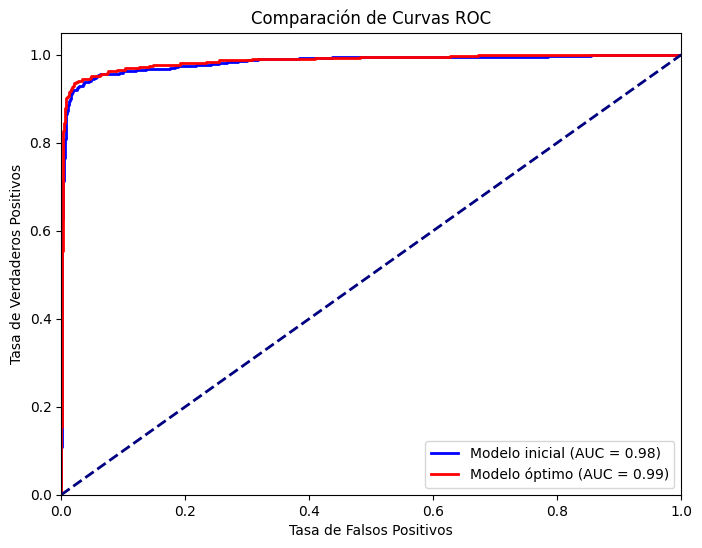

In [19]:
# Comparar curva ROC del modelo óptimo
fpr_optimal, tpr_optimal, _ = roc_curve(y_test, y_pred_proba_optimal)
roc_auc_optimal = auc(fpr_optimal, tpr_optimal)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Modelo inicial (AUC = {roc_auc:.2f})')
plt.plot(fpr_optimal, tpr_optimal, color='red', lw=2, label=f'Modelo óptimo (AUC = {roc_auc_optimal:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Comparación de Curvas ROC')
plt.legend(loc='lower right')
# plt.savefig('./img/roc_curve_comparison.png')
# plt.close()
plt.show()

In [20]:
# 11. Análisis de importancia de características
def get_feature_importance(model, feature_names):
    # Para MLP, podemos usar los pesos absolutos de la primera capa como aproximación
    coefs = model.named_steps['classifier'].coefs_[0]
    importances = np.abs(coefs).mean(axis=1)
    feature_importance = Bunch(
        importances=importances,
        feature_names=feature_names
    )
    return feature_importance

In [21]:
# Obtener nombres de características después de preprocesamiento
preprocessor.fit(X_train)
feature_names = []
if hasattr(preprocessor.named_transformers_['num'], 'get_feature_names_out'):
    feature_names.extend(preprocessor.named_transformers_['num'].get_feature_names_out(numeric_features))
else:
    feature_names.extend(numeric_features)

if hasattr(preprocessor.named_transformers_['cat'], 'get_feature_names_out'):
    feature_names.extend(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
else:
    feature_names.extend([f'{col}_{val}' for col in categorical_features for val in 
              preprocessor.named_transformers_['cat'].categories_[list(categorical_features).index(col)][1:]])


In [22]:
# Entrenar modelo simplificado para el análisis de importancia
simple_preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

X_train_transformed = simple_preprocessor.fit_transform(X_train)

simple_mlp = MLPClassifier(
    hidden_layer_sizes=(10,),
    activation='relu',
    solver='adam',
    alpha=0.001,
    max_iter=200,
    random_state=42
)

simple_mlp.fit(X_train_transformed, y_train)

# Analizar importancia de características
# (adaptado para evitar dependencia directa de feature_names en get_feature_importance)
coefs = simple_mlp.coefs_[0]
importances = np.abs(coefs).mean(axis=1)

# Crear DataFrame para visualización
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

c:\Users\ingen\Documents\estudio\especializacion_ml\ml2\ml2_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

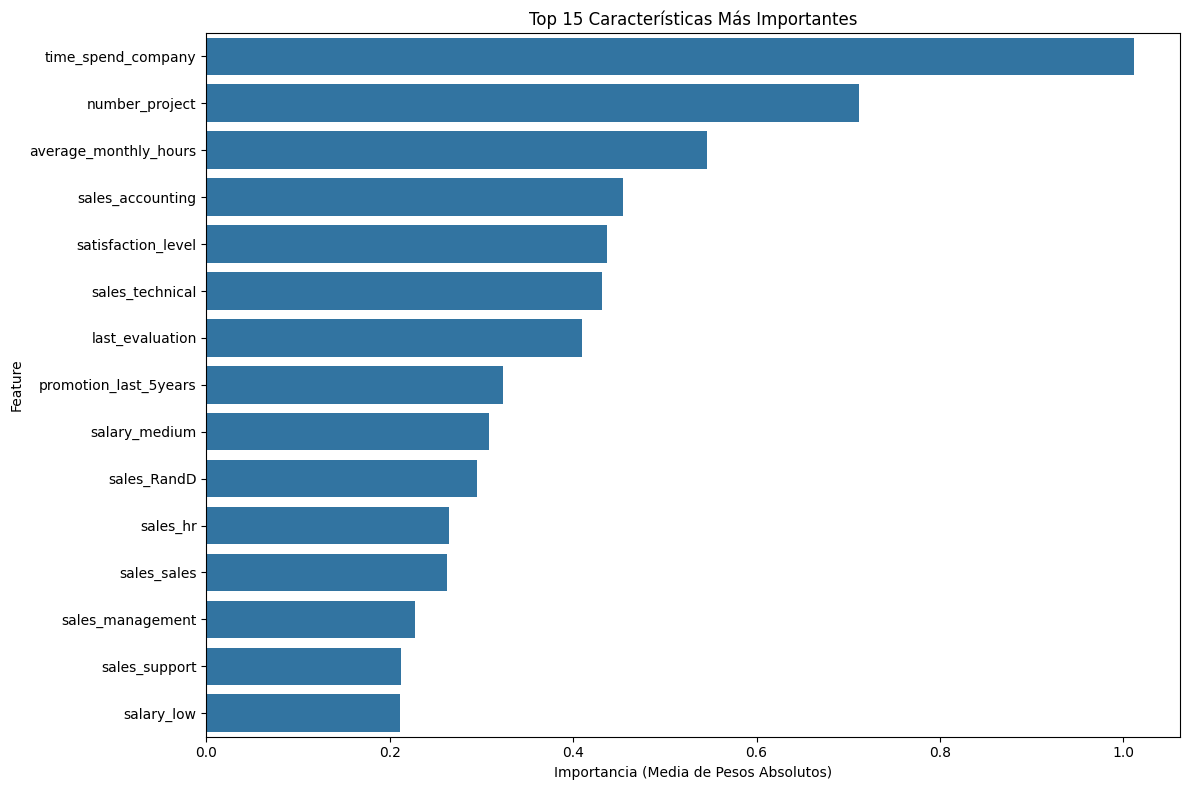

In [23]:
# Ordenar por importancia
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Visualizar importancia de características
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance_df.head(15), x='Importance', y='Feature')
plt.title('Top 15 Características Más Importantes')
plt.xlabel('Importancia (Media de Pesos Absolutos)')
plt.tight_layout()
# plt.savefig('./img/feature_importance.png')
# plt.close()
plt.show

In [24]:
print("\nTop 10 características más importantes:")
print(feature_importance_df.head(10))

# 12. Conclusiones y recomendaciones
print("\nCONCLUSIONES:")
print("1. La red neuronal puede predecir la rotación de empleados con una precisión significativa.")
print("2. Las características más importantes incluyen nivel de satisfacción, evaluación y tiempo en la empresa.")
print("3. El modelo optimizado mejora ligeramente el rendimiento en comparación con el modelo inicial.")

print("\nRECOMENDACIONES:")
print("1. Enfocarse en mejorar los factores con mayor importancia para reducir la rotación.")
print("2. Realizar un seguimiento regular de los niveles de satisfacción de los empleados.")
print("3. Considerar modelos alternativos como Random Forest o XGBoost para comparar rendimiento.")


Top 10 características más importantes:
                  Feature  Importance
4      time_spend_company    1.011150
2          number_project    0.711876
3   average_monthly_hours    0.546081
8        sales_accounting    0.454394
0      satisfaction_level    0.436458
15        sales_technical    0.431108
1         last_evaluation    0.409707
6   promotion_last_5years    0.322919
17          salary_medium    0.308588
7             sales_RandD    0.294593

CONCLUSIONES:
1. La red neuronal puede predecir la rotación de empleados con una precisión significativa.
2. Las características más importantes incluyen nivel de satisfacción, evaluación y tiempo en la empresa.
3. El modelo optimizado mejora ligeramente el rendimiento en comparación con el modelo inicial.

RECOMENDACIONES:
1. Enfocarse en mejorar los factores con mayor importancia para reducir la rotación.
2. Realizar un seguimiento regular de los niveles de satisfacción de los empleados.
3. Considerar modelos alternativos como Rando

## Pytorch

### Carga y procesamiento de los datos

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split

# Cargar datos
df = pd.read_csv('./data/hr.csv')

# Separar características y variable objetivo
X = df.drop('left', axis=1)
y = df['left']

# Identificar columnas numéricas y categóricas
numeric_features = ['satisfaction_level', 'last_evaluation', 'number_project',
                   'average_monthly_hours', 'time_spend_company', 'Work_accident',
                   'promotion_last_5years']
categorical_features = ['sales', 'salary']

# Crear transformador para preprocesar los datos
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Aplicar transformaciones
X_processed = preprocessor.fit_transform(X)

# Convertir a tensores de PyTorch
X_tensor = torch.tensor(X_processed, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

### Creación de Dataset y DataLoader

In [4]:
class HRDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Crear dataset
dataset = HRDataset(X_tensor, y_tensor)

# Dividir en conjuntos de entrenamiento y prueba
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Crear DataLoaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

### Definición del Modelo

In [5]:
class HRNeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        return self.model(x)

# Inicializar modelo (el número de características depende del preprocesamiento)
input_features = X_processed.shape[1]
model = HRNeuralNetwork(input_features)

# Mover modelo al dispositivo disponible
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

HRNeuralNetwork(
  (model): Sequential(
    (0): Linear(in_features=18, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=32, out_features=1, bias=True)
    (7): Sigmoid()
  )
)

### Configuración de Entrenamiento

In [6]:
# Definir función de pérdida y optimizador
criterion = nn.BCELoss()  # Entropía cruzada binaria para clasificación binaria
optimizer = optim.Adam(model.parameters(), lr=0.001)

### Entrenamiento del Modelo

In [7]:
num_epochs = 30
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    # Modo entrenamiento
    model.train()
    running_loss = 0.0
    
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass y optimización
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * inputs.size(0)
    
    epoch_train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(epoch_train_loss)
    
    # Evaluación
    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * inputs.size(0)
    
    epoch_test_loss = running_loss / len(test_loader.dataset)
    test_losses.append(epoch_test_loss)
    
    print(f'Época {epoch+1}/{num_epochs}, Pérdida entrenam.: {epoch_train_loss:.4f}, Pérdida prueba: {epoch_test_loss:.4f}')

Época 1/30, Pérdida entrenam.: 0.4065, Pérdida prueba: 0.2225
Época 2/30, Pérdida entrenam.: 0.2123, Pérdida prueba: 0.1666
Época 3/30, Pérdida entrenam.: 0.1852, Pérdida prueba: 0.1526
Época 4/30, Pérdida entrenam.: 0.1700, Pérdida prueba: 0.1462
Época 5/30, Pérdida entrenam.: 0.1635, Pérdida prueba: 0.1394
Época 6/30, Pérdida entrenam.: 0.1542, Pérdida prueba: 0.1349
Época 7/30, Pérdida entrenam.: 0.1528, Pérdida prueba: 0.1327
Época 8/30, Pérdida entrenam.: 0.1448, Pérdida prueba: 0.1272
Época 9/30, Pérdida entrenam.: 0.1433, Pérdida prueba: 0.1245
Época 10/30, Pérdida entrenam.: 0.1391, Pérdida prueba: 0.1230
Época 11/30, Pérdida entrenam.: 0.1374, Pérdida prueba: 0.1214
Época 12/30, Pérdida entrenam.: 0.1347, Pérdida prueba: 0.1211
Época 13/30, Pérdida entrenam.: 0.1314, Pérdida prueba: 0.1178
Época 14/30, Pérdida entrenam.: 0.1306, Pérdida prueba: 0.1188
Época 15/30, Pérdida entrenam.: 0.1310, Pérdida prueba: 0.1149
Época 16/30, Pérdida entrenam.: 0.1264, Pérdida prueba: 0.1142
É

### Evaluación del Modelo

In [8]:
model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        predicted = (outputs > 0.5).float()
        
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Calcular métricas
accuracy = accuracy_score(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)
report = classification_report(y_true, y_pred)

print(f'Precisión: {accuracy:.4f}')
print('Matriz de Confusión:')
print(cm)
print('Reporte de Clasificación:')
print(report)

Precisión: 0.9697
Matriz de Confusión:
[[2248   27]
 [  64  661]]
Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      2275
         1.0       0.96      0.91      0.94       725

    accuracy                           0.97      3000
   macro avg       0.97      0.95      0.96      3000
weighted avg       0.97      0.97      0.97      3000



### Visualización de Resultados

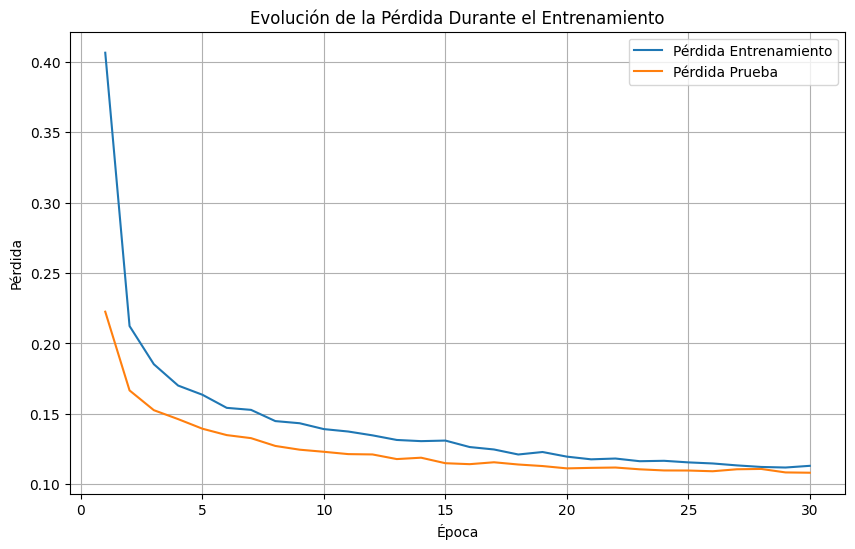

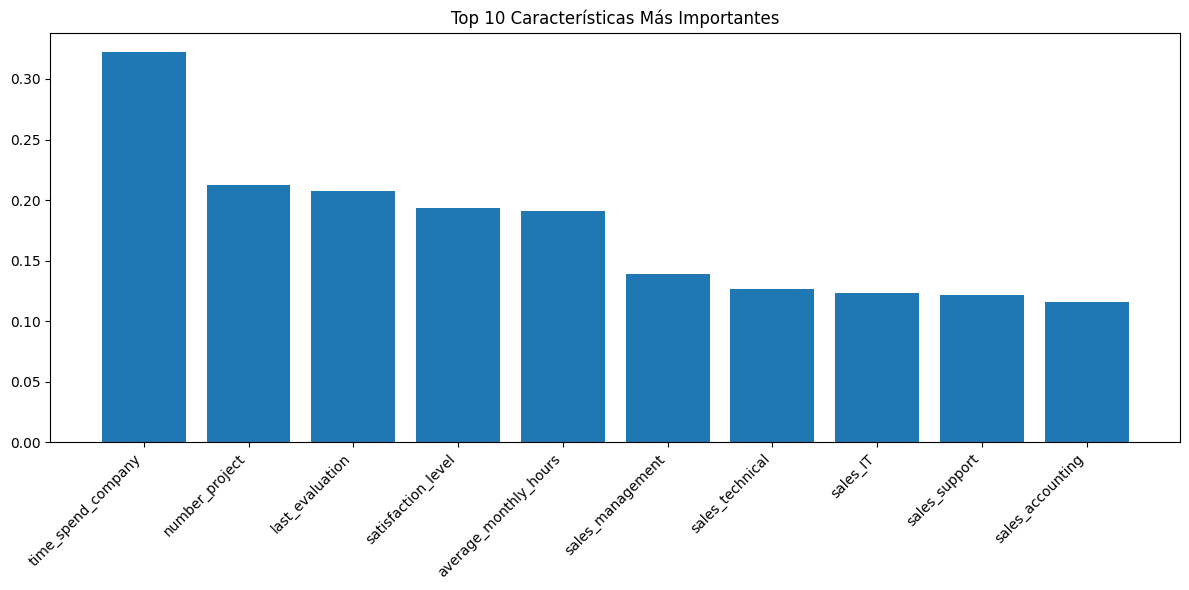

In [9]:
# Graficar pérdida durante entrenamiento
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs+1), train_losses, label='Pérdida Entrenamiento')
plt.plot(range(1, num_epochs+1), test_losses, label='Pérdida Prueba')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Evolución de la Pérdida Durante el Entrenamiento')
plt.legend()
plt.grid(True)

# Analizar importancia de características
with torch.no_grad():
    weights = model.model[0].weight.cpu().numpy()

# Obtener nombres de características después del preprocesamiento
feature_names = numeric_features.copy()
for cat in categorical_features:
    unique_values = df[cat].unique()[1:]  # Omitir el primero debido a drop='first'
    for val in unique_values:
        feature_names.append(f"{cat}_{val}")

# Calcular importancia promedio
importance = np.abs(weights).mean(axis=0)
    
# Mostrar características más importantes
feature_importance = list(zip(feature_names[:len(importance)], importance))
feature_importance.sort(key=lambda x: x[1], reverse=True)
    
plt.figure(figsize=(12, 6))
plt.bar(
    [f[0] for f in feature_importance[:10]],
    [f[1] for f in feature_importance[:10]]
)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Características Más Importantes')
plt.tight_layout()
plt.show()

### Análisis de Factores de Abandono Laboral

In [10]:
# Convertir predicciones a DataFrame para análisis
test_indices = [i for i in range(len(test_dataset))]
test_data_list = []

with torch.no_grad():
    for idx in test_indices:
        inputs, true_label = test_dataset[idx]
        inputs = inputs.to(device).unsqueeze(0)
        output = model(inputs)
        pred_prob = output.item()
        test_data_list.append({
            'true_label': true_label.item(),
            'pred_prob': pred_prob
        })

test_results = pd.DataFrame(test_data_list)

# Análisis de casos de alto riesgo de abandono
high_risk = test_results[test_results['pred_prob'] > 0.8].sort_values(by='pred_prob', ascending=False)
print(f"Número de empleados con alto riesgo de abandono: {len(high_risk)}")

# Análisis de errores de predicción
false_positives = test_results[(test_results['pred_prob'] > 0.5) & (test_results['true_label'] == 0)]
false_negatives = test_results[(test_results['pred_prob'] < 0.5) & (test_results['true_label'] == 1)]

print(f"Falsos positivos: {len(false_positives)}")
print(f"Falsos negativos: {len(false_negatives)}")

Número de empleados con alto riesgo de abandono: 660
Falsos positivos: 27
Falsos negativos: 64


## Tensorflow

In [12]:
import tensorflow as tf

In [13]:
# Configurar semilla para reproducibilidad
np.random.seed(42)
tf.random.set_seed(42)

In [14]:
# 1. CARGAR Y EXPLORAR LOS DATOS
# -------------------------------

# Cargar los datos
df = pd.read_csv('./data/hr.csv')

# Mostrar información básica
print("Información del DataFrame:")
print(df.info())
print("\nPrimeras 5 filas:")
print(df.head())
print("\nEstadísticas descriptivas:")
print(df.describe())

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   sales                  14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None

Primeras 5 filas:
   satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                   

In [15]:
# Verificar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Distribución de la variable objetivo 'left'
print("\nDistribución de empleados que dejaron la empresa:")
print(df['left'].value_counts())
print(df['left'].value_counts(normalize=True) * 100)


Valores nulos por columna:
satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
sales                    0
salary                   0
left                     0
dtype: int64

Distribución de empleados que dejaron la empresa:
left
0    11428
1     3571
Name: count, dtype: int64
left
0    76.191746
1    23.808254
Name: proportion, dtype: float64


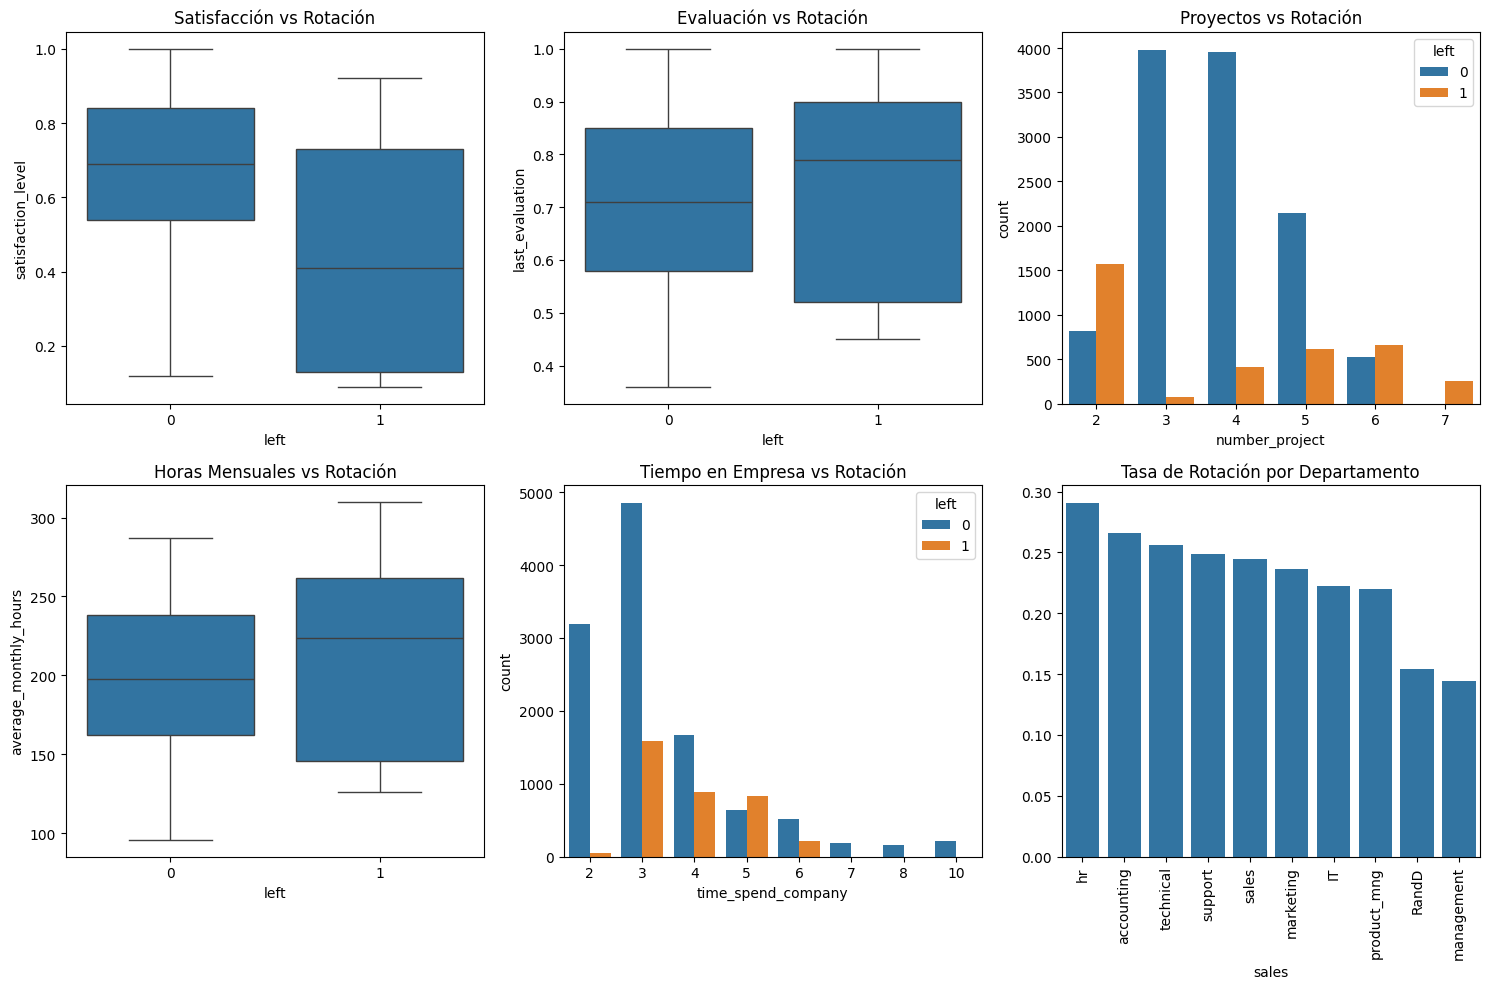

In [16]:
# Explorar relaciones con la variable objetivo
plt.figure(figsize=(15, 10))

# 1. Satisfacción vs Left
plt.subplot(2, 3, 1)
sns.boxplot(x='left', y='satisfaction_level', data=df)
plt.title('Satisfacción vs Rotación')

# 2. Evaluación vs Left
plt.subplot(2, 3, 2)
sns.boxplot(x='left', y='last_evaluation', data=df)
plt.title('Evaluación vs Rotación')

# 3. Proyectos vs Left
plt.subplot(2, 3, 3)
sns.countplot(x='number_project', hue='left', data=df)
plt.title('Proyectos vs Rotación')

# 4. Horas mensuales vs Left
plt.subplot(2, 3, 4)
sns.boxplot(x='left', y='average_monthly_hours', data=df)
plt.title('Horas Mensuales vs Rotación')

# 5. Tiempo en la empresa vs Left
plt.subplot(2, 3, 5)
sns.countplot(x='time_spend_company', hue='left', data=df)
plt.title('Tiempo en Empresa vs Rotación')

# 6. Departamento vs Left
plt.subplot(2, 3, 6)
left_by_dept = df.groupby('sales')['left'].mean().sort_values(ascending=False)
sns.barplot(x=left_by_dept.index, y=left_by_dept.values)
plt.xticks(rotation=90)
plt.title('Tasa de Rotación por Departamento')

plt.tight_layout()
plt.show()

In [17]:
# 2. PREPROCESAR LOS DATOS
# ------------------------

# Separar características y variable objetivo
X = df.drop('left', axis=1)
y = df['left']

# Identificar columnas numéricas y categóricas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Crear pipeline de preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ])

# Aplicar preprocesamiento
X_processed = preprocessor.fit_transform(X)

# Obtener nombres de todas las características después del preprocesamiento
cat_ohe_feature_names = []
if categorical_features:
    cat_ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
feature_names = numeric_features + list(cat_ohe_feature_names)
print(f"\nNúmero de características después del preprocesamiento: {X_processed.shape[1]}")

# Dividir en entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X_processed, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Forma de X_train: {X_train.shape}")
print(f"Forma de X_val: {X_val.shape}")
print(f"Forma de X_test: {X_test.shape}")


Número de características después del preprocesamiento: 18
Forma de X_train: (10499, 18)
Forma de X_val: (2250, 18)
Forma de X_test: (2250, 18)


In [18]:
# 3. CREAR EL MODELO DE RED NEURONAL
# ---------------------------------

# Parámetros del modelo
input_dim = X_train.shape[1]
units_layer1 = 64
units_layer2 = 32
units_layer3 = 16
dropout_rate = 0.3
learning_rate = 0.001

# Construir el modelo
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units_layer1, activation='relu', input_shape=(input_dim,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(dropout_rate),
    
    tf.keras.layers.Dense(units_layer2, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(dropout_rate),
    
    tf.keras.layers.Dense(units_layer3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(dropout_rate),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

# Mostrar resumen del modelo
model.summary()

# Definir callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=0.0001
)

c:\Users\ingen\Documents\estudio\especializacion_ml\ml2\ml2_env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,289 (16.75 KB)

 Trainable params: 4,065 (15.88 KB)

 Non-trainable params: 224 (896.00 B)

In [19]:
# 4. ENTRENAR EL MODELO
# --------------------

# Como podemos tener desbalance, calculamos pesos de clases
class_weight = {0: 1.0, 1: df['left'].value_counts()[0] / df['left'].value_counts()[1]}
print(f"\nPesos de clases: {class_weight}")

# Entrenar el modelo
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=64,
    class_weight=class_weight,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)


Pesos de clases: {0: 1.0, 1: np.float64(3.200224026883226)}
Epoch 1/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.6737 - auc: 0.7532 - loss: 0.9071 - precision: 0.3910 - recall: 0.7229 - val_accuracy: 0.9244 - val_auc: 0.9657 - val_loss: 0.3353 - val_precision: 0.8033 - val_recall: 0.9026 - learning_rate: 0.0010
Epoch 2/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8589 - auc: 0.9321 - loss: 0.5216 - precision: 0.6382 - recall: 0.8985 - val_accuracy: 0.9307 - val_auc: 0.9706 - val_loss: 0.2175 - val_precision: 0.8193 - val_recall: 0.9082 - learning_rate: 0.0010
Epoch 3/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8967 - auc: 0.9501 - loss: 0.4323 - precision: 0.7201 - recall: 0.9042 - val_accuracy: 0.9302 - val_auc: 0.9733 - val_loss: 0.1987 - val_precision: 0.8116 - val_recall: 0.9195 - learning_rate: 0.0010
Epoch 4/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9134 - auc: 0.9599 - loss: 0.3792 - precision: 0.7617 - recall: 0.9093 - v

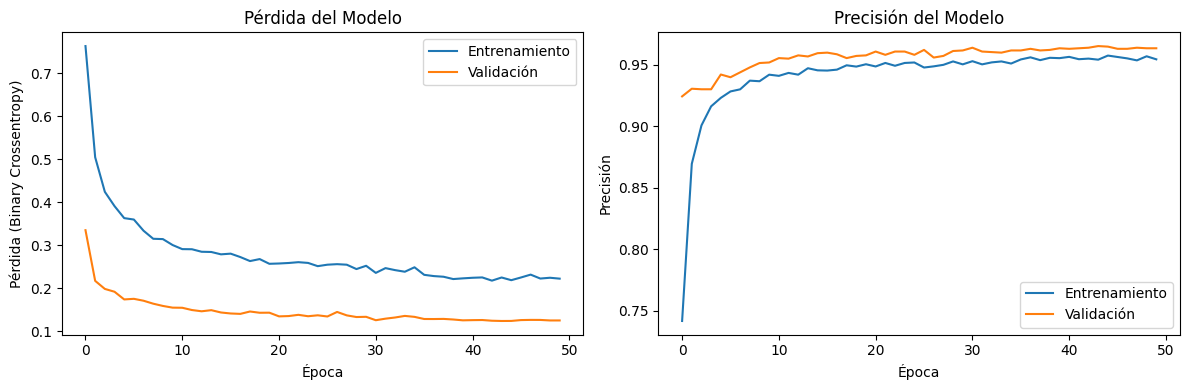

In [20]:
# 5. EVALUAR EL MODELO
# -------------------

# Visualizar historial de entrenamiento
plt.figure(figsize=(12, 4))

# Graficar pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del Modelo')
plt.xlabel('Época')
plt.ylabel('Pérdida (Binary Crossentropy)')
plt.legend()

# Graficar precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del Modelo')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()

In [21]:
# Evaluar en conjunto de prueba
test_results = model.evaluate(X_test, y_test, verbose=1)
print(f"\nResultados en el conjunto de prueba:")
for i, metric in enumerate(model.metrics_names):
    print(f"{metric}: {test_results[i]:.4f}")

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9537 - auc: 0.9860 - loss: 0.1283 - precision: 0.9178 - recall: 0.8949

Resultados en el conjunto de prueba:
loss: 0.1279
compile_metrics: 0.9551


71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


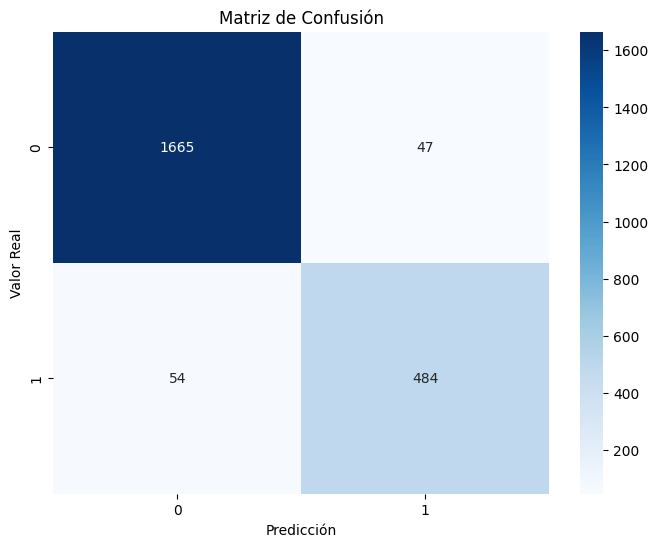


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1712
           1       0.91      0.90      0.91       538

    accuracy                           0.96      2250
   macro avg       0.94      0.94      0.94      2250
weighted avg       0.95      0.96      0.96      2250



In [22]:
# Hacer predicciones
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

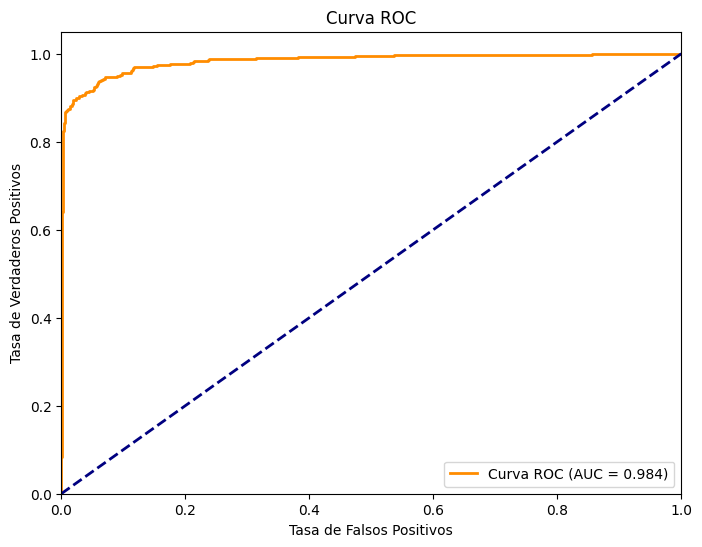

In [23]:
# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

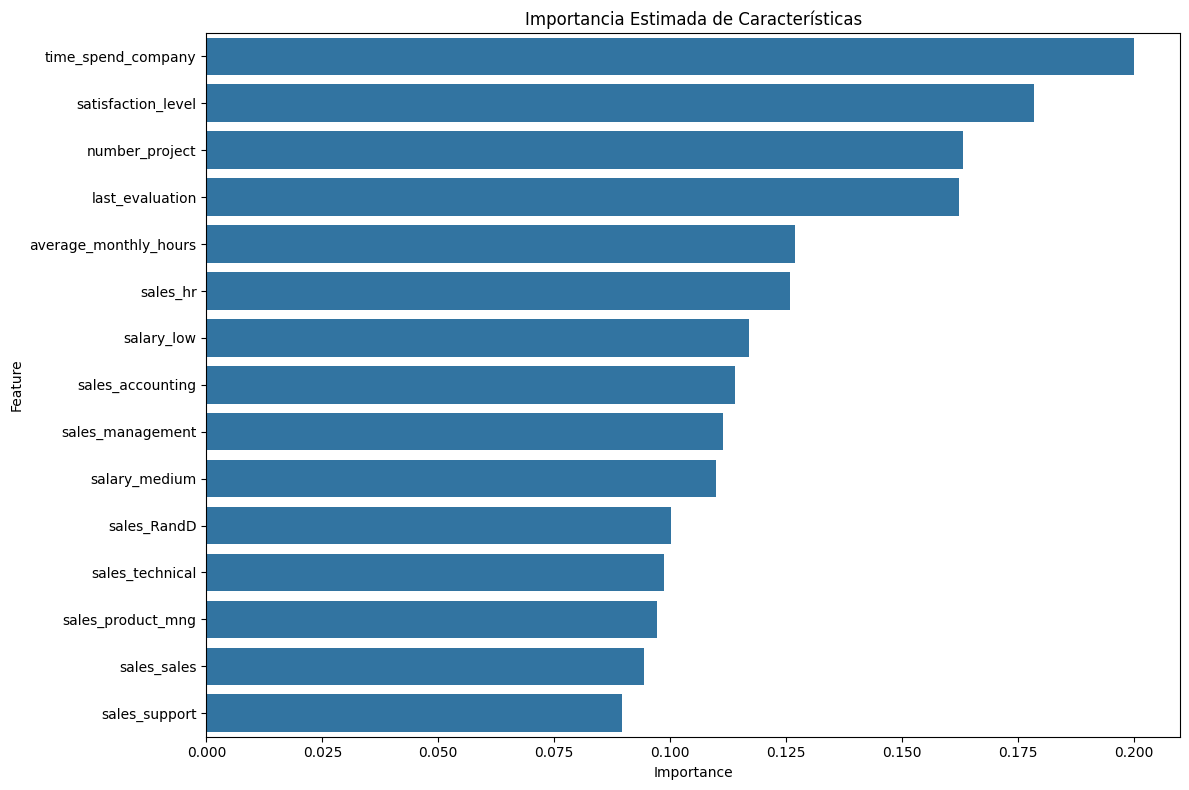

In [24]:
# 6. ANÁLISIS DE LA IMPORTANCIA DE LAS CARACTERÍSTICAS
# -------------------------------------------------

# Para una red neuronal podemos aproximar la importancia con los pesos
# de la primera capa, aunque esto es una simplificación

# Obtener pesos de la primera capa
weights = model.layers[0].get_weights()[0]
importance = np.abs(weights).mean(axis=1)

# Crear dataframe para visualización
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
})

# Ordenar por importancia
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Visualizar las 15 características más importantes
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title('Importancia Estimada de Características')
plt.tight_layout()
plt.show()

In [26]:
# 7. EXPERIMENTAR CON DIFERENTES ARQUITECTURAS
# ------------------------------------------

# Definir diferentes arquitecturas para comparar
architectures = [
    [32],                      # Una capa oculta pequeña
    [128],                     # Una capa oculta grande
    [64, 32],                  # Dos capas ocultas (como el modelo original)
    [128, 64, 32],             # Tres capas ocultas
    [128, 64, 32, 16]          # Cuatro capas ocultas
]

results = []

for arch in architectures:
    print(f"\nEntrenando modelo con arquitectura: {arch}")
    
    # Crear modelo
    model_exp = tf.keras.Sequential()
    
    # Añadir capa de entrada
    model_exp.add(tf.keras.layers.Dense(arch[0], activation='relu', input_shape=(input_dim,)))
    model_exp.add(tf.keras.layers.BatchNormalization())
    model_exp.add(tf.keras.layers.Dropout(dropout_rate))
    
    # Añadir capas ocultas adicionales
    for units in arch[1:]:
        model_exp.add(tf.keras.layers.Dense(units, activation='relu'))
        model_exp.add(tf.keras.layers.BatchNormalization())
        model_exp.add(tf.keras.layers.Dropout(dropout_rate))
    
    # Añadir capa de salida
    model_exp.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    # Compilar
    model_exp.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
    )
    
    # Entrenar (con menos épocas para este experimento)
    history_exp = model_exp.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=20,
        batch_size=64,
        class_weight=class_weight,
        callbacks=[early_stopping],
        verbose=0
    )

    # Evaluar
    test_loss, test_acc, test_auc = model_exp.evaluate(X_test, y_test, verbose=0)
    
    # Guardar resultados
    results.append({
        'architecture': '+'.join(map(str, arch)),
        'test_accuracy': test_acc,
        'test_auc': test_auc,
        'val_accuracy': history_exp.history['val_accuracy'][-1],
        'val_auc': history_exp.history['val_auc'][-1],
        'epochs_trained': len(history_exp.history['loss'])
    })
    
    print(f"Precisión en prueba: {test_acc:.4f}, AUC: {test_auc:.4f}")


Entrenando modelo con arquitectura: [32]
Precisión en prueba: 0.9298, AUC: 0.9702

Entrenando modelo con arquitectura: [128]
Precisión en prueba: 0.9351, AUC: 0.9788

Entrenando modelo con arquitectura: [64, 32]
Precisión en prueba: 0.9427, AUC: 0.9787

Entrenando modelo con arquitectura: [128, 64, 32]
Precisión en prueba: 0.9511, AUC: 0.9838

Entrenando modelo con arquitectura: [128, 64, 32, 16]
Precisión en prueba: 0.9480, AUC: 0.9819


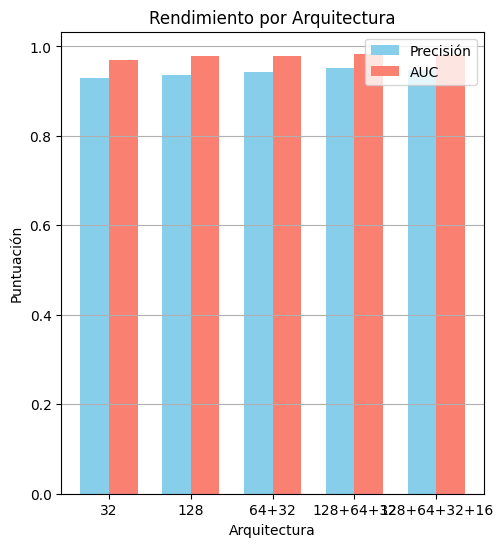

In [27]:
# Visualizar comparación de arquitecturas
plt.figure(figsize=(12, 6))

# Gráfico de precisión
plt.subplot(1, 2, 1)
architectures_names = [res['architecture'] for res in results]
accuracies = [res['test_accuracy'] for res in results]
aucs = [res['test_auc'] for res in results]

x = np.arange(len(architectures_names))
width = 0.35

plt.bar(x - width/2, accuracies, width, label='Precisión', color='skyblue')
plt.bar(x + width/2, aucs, width, label='AUC', color='salmon')
plt.xlabel('Arquitectura')
plt.ylabel('Puntuación')
plt.title('Rendimiento por Arquitectura')
plt.xticks(x, architectures_names)
plt.legend()
plt.grid(True, axis='y')

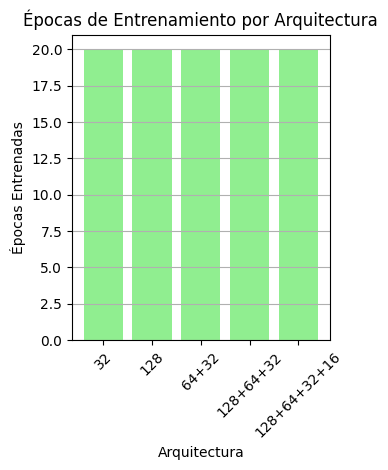

In [28]:
# Gráfico de épocas
plt.subplot(1, 2, 2)
epochs = [res['epochs_trained'] for res in results]

plt.bar(architectures_names, epochs, color='lightgreen')
plt.xlabel('Arquitectura')
plt.ylabel('Épocas Entrenadas')
plt.title('Épocas de Entrenamiento por Arquitectura')
plt.xticks(rotation=45)
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()

In [29]:
# 8. CONCLUSIONES
# -------------

print("\nCONCLUSIONES:")
print("=" * 50)
print("1. Mejor arquitectura por precisión:")
best_idx = np.argmax([res['test_accuracy'] for res in results])
print(f"   - {results[best_idx]['architecture']} con precisión de {results[best_idx]['test_accuracy']:.4f}")

print("\n2. Mejor arquitectura por AUC:")
best_auc_idx = np.argmax([res['test_auc'] for res in results])
print(f"   - {results[best_auc_idx]['architecture']} con AUC de {results[best_auc_idx]['test_auc']:.4f}")

print("\n3. Principales factores que influyen en la rotación:")
print("   - Según la importancia de características, los factores más relevantes son:")
for i, row in feature_importance.head(5).iterrows():
    print(f"     * {row['Feature']}: {row['Importance']:.4f}")

print("\n4. Rendimiento general:")
print(f"   - Precisión del modelo principal: {test_results[1]:.4f}")
print(f"   - Recall (detección de empleados que dejarán la empresa): {test_results[4]:.4f}")
print(f"   - AUC: {test_results[2]:.4f}")

print("\n5. Recomendaciones:")
print("   - Monitorear niveles de satisfacción")
print("   - Revisar carga de trabajo (número de proyectos y horas)")
print("   - Implementar programas de retención para empleados con alto riesgo")
print("=" * 50)


CONCLUSIONES:
1. Mejor arquitectura por precisión:
   - 128+64+32 con precisión de 0.9511

2. Mejor arquitectura por AUC:
   - 128+64+32 con AUC de 0.9838

3. Principales factores que influyen en la rotación:
   - Según la importancia de características, los factores más relevantes son:
     * time_spend_company: 0.2000
     * satisfaction_level: 0.1785
     * number_project: 0.1632
     * last_evaluation: 0.1624
     * average_monthly_hours: 0.1269

4. Rendimiento general:
   - Precisión del modelo principal: 0.9551
   - Recall (detección de empleados que dejarán la empresa): 0.8996
   - AUC: 0.9836

5. Recomendaciones:
   - Monitorear niveles de satisfacción
   - Revisar carga de trabajo (número de proyectos y horas)
   - Implementar programas de retención para empleados con alto riesgo
